# Part I - Loan Data From Prosper
## by Kenneth Mambo

## Introduction
> Prosper loan dataset.This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. In this analysis, I will focus on a few variables.







## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### Load the dataset

In [2]:
loans = pd.read_csv('prosperLoanData.csv')

#### High-level overview of data shape and composition

In [3]:
print(loans.shape)

(113937, 81)


In [4]:
print(loans.dtypes)

ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64
IsBorrowerHom

In [5]:
loans.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [6]:
# descriptive statistics for numeric variables
loans.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In this analysis I will use the following variables

In [7]:
col_to_use = ['ListingCreationDate', 'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate', 'LenderYield',
            'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation',
            'EmploymentStatus','AmountDelinquent','IncomeRange', 'StatedMonthlyIncome','LoanCurrentDaysDelinquent',
            'LoanOriginalAmount', 'LoanOriginationDate', 'MonthlyLoanPayment', 'LP_ServiceFees', 'Investors']

In [8]:
df_loans = loans.loc[:,col_to_use]
df_loans.head()

,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),...,EmploymentStatus,AmountDelinquent,IncomeRange,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,LP_ServiceFees,Investors
0,2007-08-26 19:09:29.263000000,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,0,...,Self-employed,472.0,"$25,000-49,999",3083.333333,0,9425,2007-09-12 00:00:00,330.43,-133.18,258
1,2014-02-27 08:28:07.900000000,36,Current,NaN,0.12016,0.0920,0.0820,A,7.0,2,...,Employed,0.0,"$50,000-74,999",6125.000000,0,10000,2014-03-03 00:00:00,318.93,0.00,1
2,2007-01-05 15:00:47.090000000,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,0,...,Not available,NaN,Not displayed,2083.333333,0,3001,2007-01-17 00:00:00,123.32,-24.20,41
3,2012-10-22 11:02:35.010000000,36,Current,NaN,0.12528,0.0974,0.0874,A,9.0,16,...,Employed,10056.0,"$25,000-49,999",2875.000000,0,10000,2012-11-01 00:00:00,321.45,-108.01,158
4,2013-09-14 18:38:39.097000000,36,Current,NaN,0.24614,0.2085,0.1985,D,4.0,2,...,Employed,0.0,"$100,000+",9583.333333,0,15000,2013-09-20 00:00:00,563.97,-60.27,20


In [9]:
# high-level overview of data shape and composition of the new dataframe
print(df_loans.shape)
print(df_loans.dtypes)

(113937, 22)
ListingCreationDate           object
Term                           int64
LoanStatus                    object
ClosedDate                    object
BorrowerAPR                  float64
BorrowerRate                 float64
LenderYield                  float64
ProsperRating (Alpha)         object
ProsperScore                 float64
ListingCategory (numeric)      int64
BorrowerState                 object
Occupation                    object
EmploymentStatus              object
AmountDelinquent             float64
IncomeRange                   object
StatedMonthlyIncome          float64
LoanCurrentDaysDelinquent      int64
LoanOriginalAmount             int64
LoanOriginationDate           object
MonthlyLoanPayment           float64
LP_ServiceFees               float64
Investors                      int64
dtype: object


In [10]:
df_loans.duplicated().sum()

0

In [11]:
#Adjust Datetime columns to Datetime using pandas to_datetime
df_loans['ListingCreationDate'] = pd.to_datetime(df_loans['ListingCreationDate']) 
df_loans['ClosedDate'] = pd.to_datetime(df_loans['ClosedDate'])
df_loans['LoanOriginationDate'] = pd.to_datetime(df_loans['LoanOriginationDate'])

In [12]:
#Adjust datatype for all other categorical columns
df_loans['Occupation'] = df_loans['Occupation'].astype('category')
df_loans['BorrowerState'] = df_loans['BorrowerState'].astype('category')
df_loans['LoanStatus'] = df_loans['LoanStatus'].astype('category')
df_loans['ListingCategory (numeric)'] = df_loans['ListingCategory (numeric)'].astype('category')
df_loans['EmploymentStatus'] = df_loans['EmploymentStatus'].astype('category')

In [13]:
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 22 columns):
ListingCreationDate          113937 non-null datetime64[ns]
Term                         113937 non-null int64
LoanStatus                   113937 non-null category
ClosedDate                   55089 non-null datetime64[ns]
BorrowerAPR                  113912 non-null float64
BorrowerRate                 113937 non-null float64
LenderYield                  113937 non-null float64
ProsperRating (Alpha)        84853 non-null object
ProsperScore                 84853 non-null float64
ListingCategory (numeric)    113937 non-null category
BorrowerState                108422 non-null category
Occupation                   110349 non-null category
EmploymentStatus             111682 non-null category
AmountDelinquent             106315 non-null float64
IncomeRange                  113937 non-null object
StatedMonthlyIncome          113937 non-null float64
LoanCurrentDaysDelinquent    

### What is the structure of your dataset?

> The dataset has 113937 rows and 22 columns.

### What is/are the main feature(s) of interest in your dataset?

> The main features are borrower APR, borrower rate, prosper score, Loan original amount, Loan term, Loan monthly payment, lenders yield, Borrower Occupation.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The BorrowerRate refers to the annual cost of a loan to a borrower and is expressed as a percentage. The interest rate does not include fees charged for the loan while the BorrowerAPR is the annual cost of a loan to a borrower
> The BorrowerAPR is the annual cost of a loan to a borrower
> ProsperScore is a custom risk score built using historical Prosper  data. The score ranges from 1-10, with 10 being the best, or lowest  risk score
> The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.





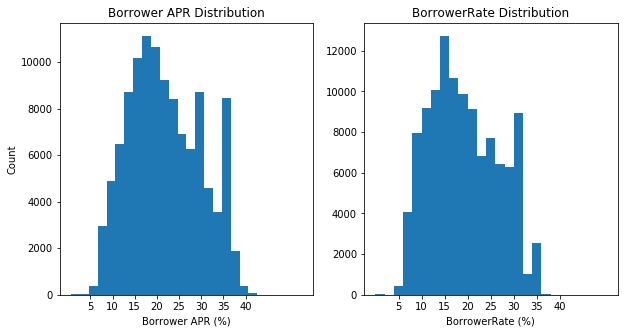

In [14]:
#BorrowerAPR
binsize = 2
borrower_APR_percentage = df_loans['BorrowerAPR']*100
bins = np.arange(df_loans['BorrowerAPR'].min()*100, df_loans['BorrowerAPR'].max()*100+binsize, binsize)
# First plot
plt.figure(figsize=[10, 5])
plt.subplot(1,2,1)
plt.hist(borrower_APR_percentage.dropna().values, bins=bins)
plt.title('Borrower APR Distribution')
plt.xlabel('Borrower APR (%)')
plt.ylabel('Count')
plt.xticks([5, 10, 15, 20, 25, 30, 35, 40], ['5','10', '15', '20', '25', '30', '35', '40'])

#BorrowerRate
binsize = 2
borrower_rate = df_loans['BorrowerRate']*100
bins2 = np.arange(df_loans['BorrowerRate'].min()*100, df_loans['BorrowerRate'].max()*100+binsize, binsize)
# Second plot
plt.subplot(1,2,2)
plt.hist(borrower_rate, bins=bins2)
plt.title('BorrowerRate Distribution')
plt.xlabel('BorrowerRate (%)')
# plt.ylabel('Count')
plt.xticks([5, 10, 15, 20, 25, 30, 35, 40], ['5','10', '15', '20', '25', '30', '35', '40']);

The BorrowerRate refers to the annual cost of a loan to  a borrower and is expressed as a percentage. The interest rate does not  include fees charged for the loan while the BorrowerAPR is the annual cost of a loan to a borrower. Unlike an interest rate, it includes other charges or fees (such as mortgage  insurance, most closing costs, discount points and loan origination  fees) to reflect the total cost of the loan.
The distribution of BorrowerAPR and BorrowerRate are supposed to be similar with  slight difference since the APR is always higher than the interest rate.

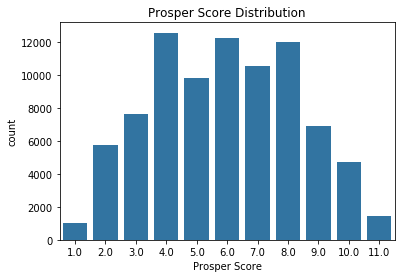

In [15]:
#Prosper Score Distribution (range form 1 to 10)
base_color = sb.color_palette()[0]
sb.countplot(data=df_loans, x= 'ProsperScore', color=base_color)
plt.title('Prosper Score Distribution')
plt.xlabel('Prosper Score');

ProsperScore is a custom risk score built using historical Prosper  data. The score ranges from 1-10, with 10 being the best, or lowest  risk score.
The prosper score is normally distributed.

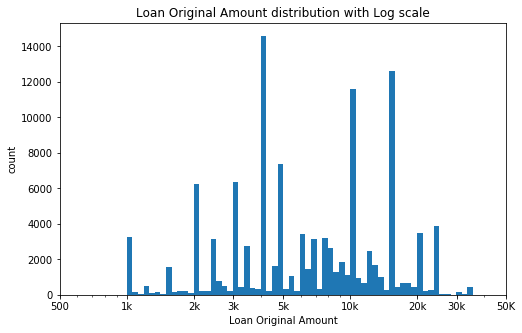

In [16]:
# Loan Original Amount in a log-scale
log_binsize = 0.025
bins = 10 ** np.arange(3, np.log10(df_loans['LoanOriginalAmount'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loans, x = 'LoanOriginalAmount', bins = bins)
plt.title('Loan Original Amount distribution with Log scale')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3,3e3, 5e3, 1e4, 2e4, 3e4, 5e4], ['500', '1k', '2k', '3k', '5k', '10k', '20k', '30k', '50K'])
plt.xlabel('Loan Original Amount')
plt.ylabel('count')
plt.show()

Most loans are between the 3k and 5k then between 10k and 20k.

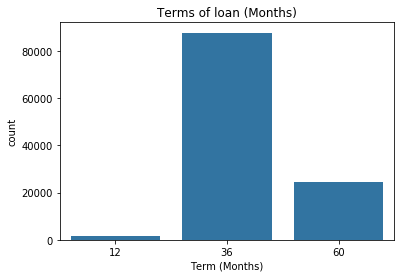

In [17]:
base_color = sb.color_palette()[0]
sb.countplot(data=df_loans,x= 'Term',color=base_color);
plt.title('Terms of loan (Months)')
plt.xlabel('Term (Months)');

Most loans are in the 36 months term and lowest preference is one year.

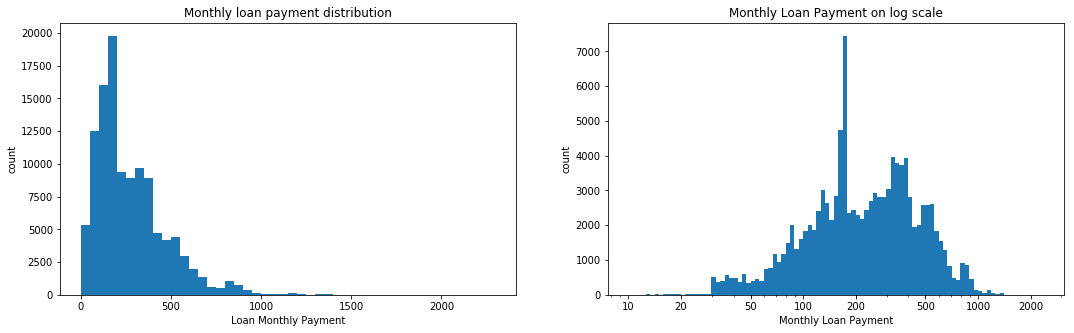

In [18]:
# Monthly loan payment distribution
binsize = 50
bins = np.arange(0, df_loans['MonthlyLoanPayment'].max()+binsize, binsize)

plt.figure(figsize=[18, 5])
plt.subplot(1,2,1)
plt.hist(data = df_loans, x = 'MonthlyLoanPayment', bins = bins)
plt.xlabel('Loan Monthly Payment')
plt.ylabel('count')
plt.title('Monthly loan payment distribution')


# Using log-scale
log_binsize = 0.025
bins = 10 ** np.arange(1, np.log10(df_loans['MonthlyLoanPayment'].max())+log_binsize, log_binsize)

plt.subplot(1,2,2)
plt.hist(data = df_loans, x = 'MonthlyLoanPayment', bins = bins)
plt.xscale('log')
plt.xticks([10, 20, 50, 100, 200, 500, 1e3, 2e3], ['10', '20','50', '100', '200', '500', '1000', '2000'])
plt.xlabel('Monthly Loan Payment')
plt.ylabel('count')
plt.title('Monthly Loan Payment on log scale');

The monthly loan payment distribution is skewed to the right hence we plot it on log.

On log, it is normally distributed with sharp peak between 100 and 200

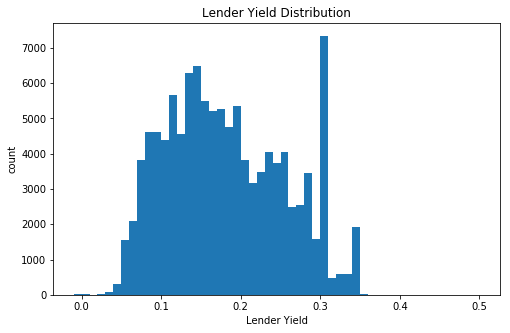

In [19]:
#Lender Yield Distribution
binsize = 0.01
bins = np.arange(df_loans['LenderYield'].min(), df_loans['LenderYield'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loans, x = 'LenderYield', bins = bins)
plt.xlabel('Lender Yield')
plt.title('Lender Yield Distribution')
plt.ylabel('count');

Lender yield is normally distributed.
Most values fall between 0.1 and 0.2 at 0.3 there is a sharp increase

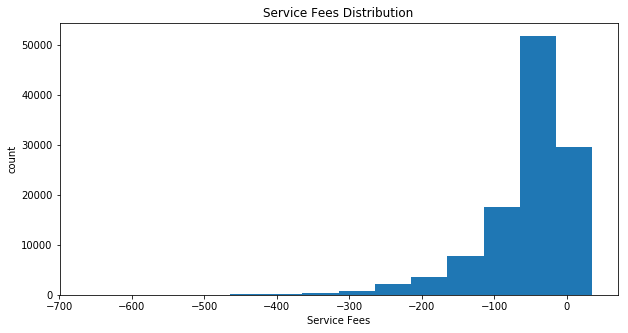

In [20]:
# Service Fees Distribution
binsize = 50
bins = np.arange(df_loans['LP_ServiceFees'].min(), df_loans['LP_ServiceFees'].max()+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = df_loans, x = 'LP_ServiceFees', bins = bins)
plt.xlabel('Service Fees')
plt.title('Service Fees Distribution')
plt.ylabel('count');

Service fee is skewed to left

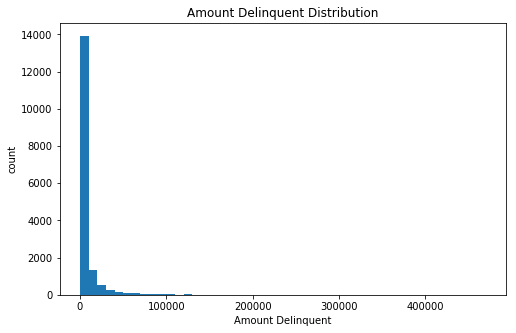

In [21]:
#Amount Delinquent Distribution
binsize = 10000
bins = np.arange(df_loans['AmountDelinquent'].min(), df_loans['AmountDelinquent'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loans[df_loans['AmountDelinquent']>0], x = 'AmountDelinquent', bins = bins)
plt.title('Amount Delinquent Distribution')
plt.xlabel('Amount Delinquent')
plt.ylabel('count');

Amount of delinquent is skewed to the right 
We will put it on log because it has no negative values

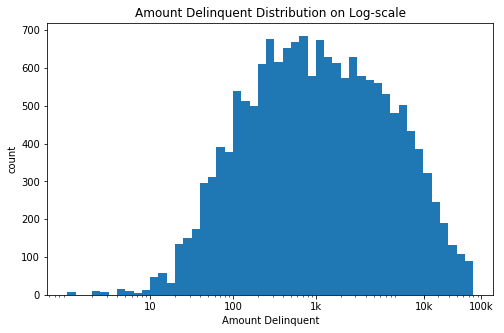

In [22]:
#Amount Delinquent Distribution on a log scale

log_binsize = 0.1
bins = 10 ** np.arange(0,5, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(df_loans['AmountDelinquent'].dropna().values, bins = bins)
plt.title('Amount Delinquent Distribution on Log-scale')
plt.xscale('log')
plt.xticks([1e1, 1e2, 1e3, 2e4, 1e5], ['10', '100', '1k', '10k', '100k'])
plt.xlabel('Amount Delinquent')
plt.ylabel('count');

On the log scale we see it is normally distributed

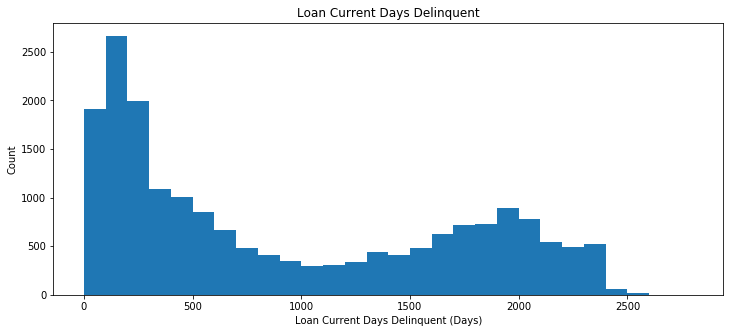

In [23]:
# Loan Current Days Delinquent Distribution
binsize = 100
bins = np.arange(0, df_loans['LoanCurrentDaysDelinquent'].max()+binsize, binsize)

plt.figure(figsize=[12, 5])
plt.hist(data = df_loans[df_loans['LoanCurrentDaysDelinquent']>0], x = 'LoanCurrentDaysDelinquent', bins = bins)
plt.title('Loan Current Days Delinquent')
plt.xlabel('Loan Current Days Delinquent (Days)')
plt.ylabel('Count');

The distribution is bimodal

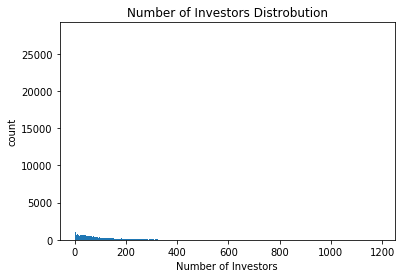

In [24]:
#Number of Investors Distribution
binsize = 1
bins = np.arange(df_loans['Investors'].min(), df_loans['Investors'].max()+binsize, binsize)

#plt.figure(figsize=[8, 5])
plt.hist(data = df_loans[df_loans['Investors'] > 0], x = 'Investors', bins = bins)
plt.xlabel('Number of Investors')
plt.title('Number of Investors Distrobution')
plt.ylabel('count');

We can't see anything we use log to see

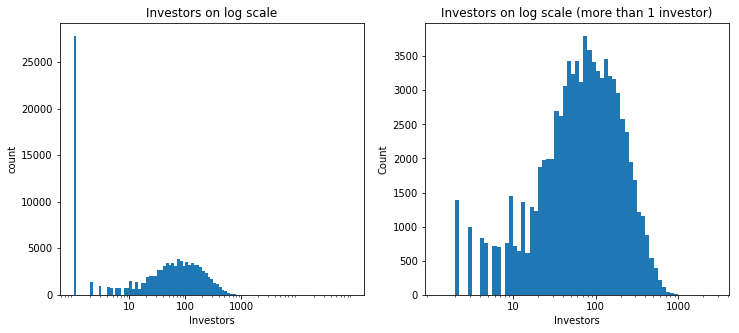

In [25]:
#Number of Investors Distrobution on log scale for all loans
log_binsize = 0.05
bins = 10 ** np.arange(0, 5, log_binsize)

plt.figure(figsize=[12, 5])
plt.subplot(1,2,1)
plt.hist(data = df_loans, x = 'Investors', bins = bins)
plt.title('Investors on log scale')
plt.xscale('log')
plt.xticks([1e1, 1e2, 1e3], ['10', '100', '1000'])
plt.xlabel('Investors')
plt.ylabel('count')

#We can plot the same for only loans with more than 1 investor
log_binsize = 0.05
bins = 10 ** np.arange(0.1, 3.5, log_binsize)

plt.subplot(1,2,2)
plt.hist(data = df_loans, x = 'Investors', bins = bins)
plt.title('Investors on log scale (more than 1 investor)')
plt.xscale('log')
plt.xticks([1e1, 1e2, 1e3], ['10', '100', '1000'])
plt.xlabel('Investors')
plt.ylabel('Count');

Number of investors (for data with number of investors more than 1) is almost normally distributed

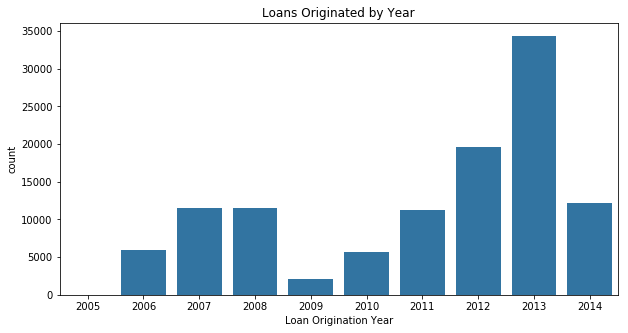

In [26]:
# Loan Origination by Year
plt.figure(figsize=[10, 5])
sb.countplot(data=df_loans,x=df_loans['LoanOriginationDate'].dt.year,color=base_color)
plt.title('Loans Originated by Year')
plt.xlabel('Loan Origination Year');

We can see that there is a drop in 2009(maybe because of the crash) in loans but it started to increase gradually

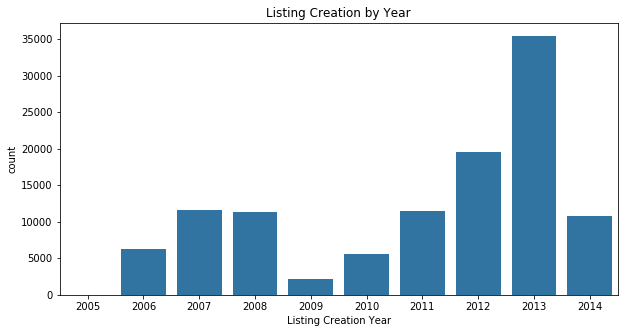

In [27]:
# Listing Creation  by Year
base_color = sb.color_palette()[0]
plt.figure(figsize=[10, 5])
sb.countplot(data=df_loans,x=df_loans['ListingCreationDate'].dt.year,color=base_color)
plt.title('Listing Creation by Year')
plt.xlabel('Listing Creation Year');

Listing creation year has the same distribution as loan origination year.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> BorrowerAPR and BorrowerRate are normally distributed and almost the same.
Prosper score is highest at 4, 6 and 8 and is normally distributed.
Loan Original Amount distribution is right skewed and I performed log transformation on it to interpret the visualization.
I did the log transformation to these variables: Monthly Loan Payment, Investors.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> On the investor column. Normally you could not observe anything and on the log, the less than or equal to one had a very high amount of count and I had to plot only those with greater than one investor to see the full details of the distribution. 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [28]:
numeric_variables = ['Term', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'ProsperScore', 'StatedMonthlyIncome',
                     'LoanOriginalAmount', 'MonthlyLoanPayment', 'LP_ServiceFees', 'Investors','AmountDelinquent',
                     'LoanCurrentDaysDelinquent']
categorical_variables = ['LoanStatus', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 
                         'EmploymentStatus', 'IncomeRange']

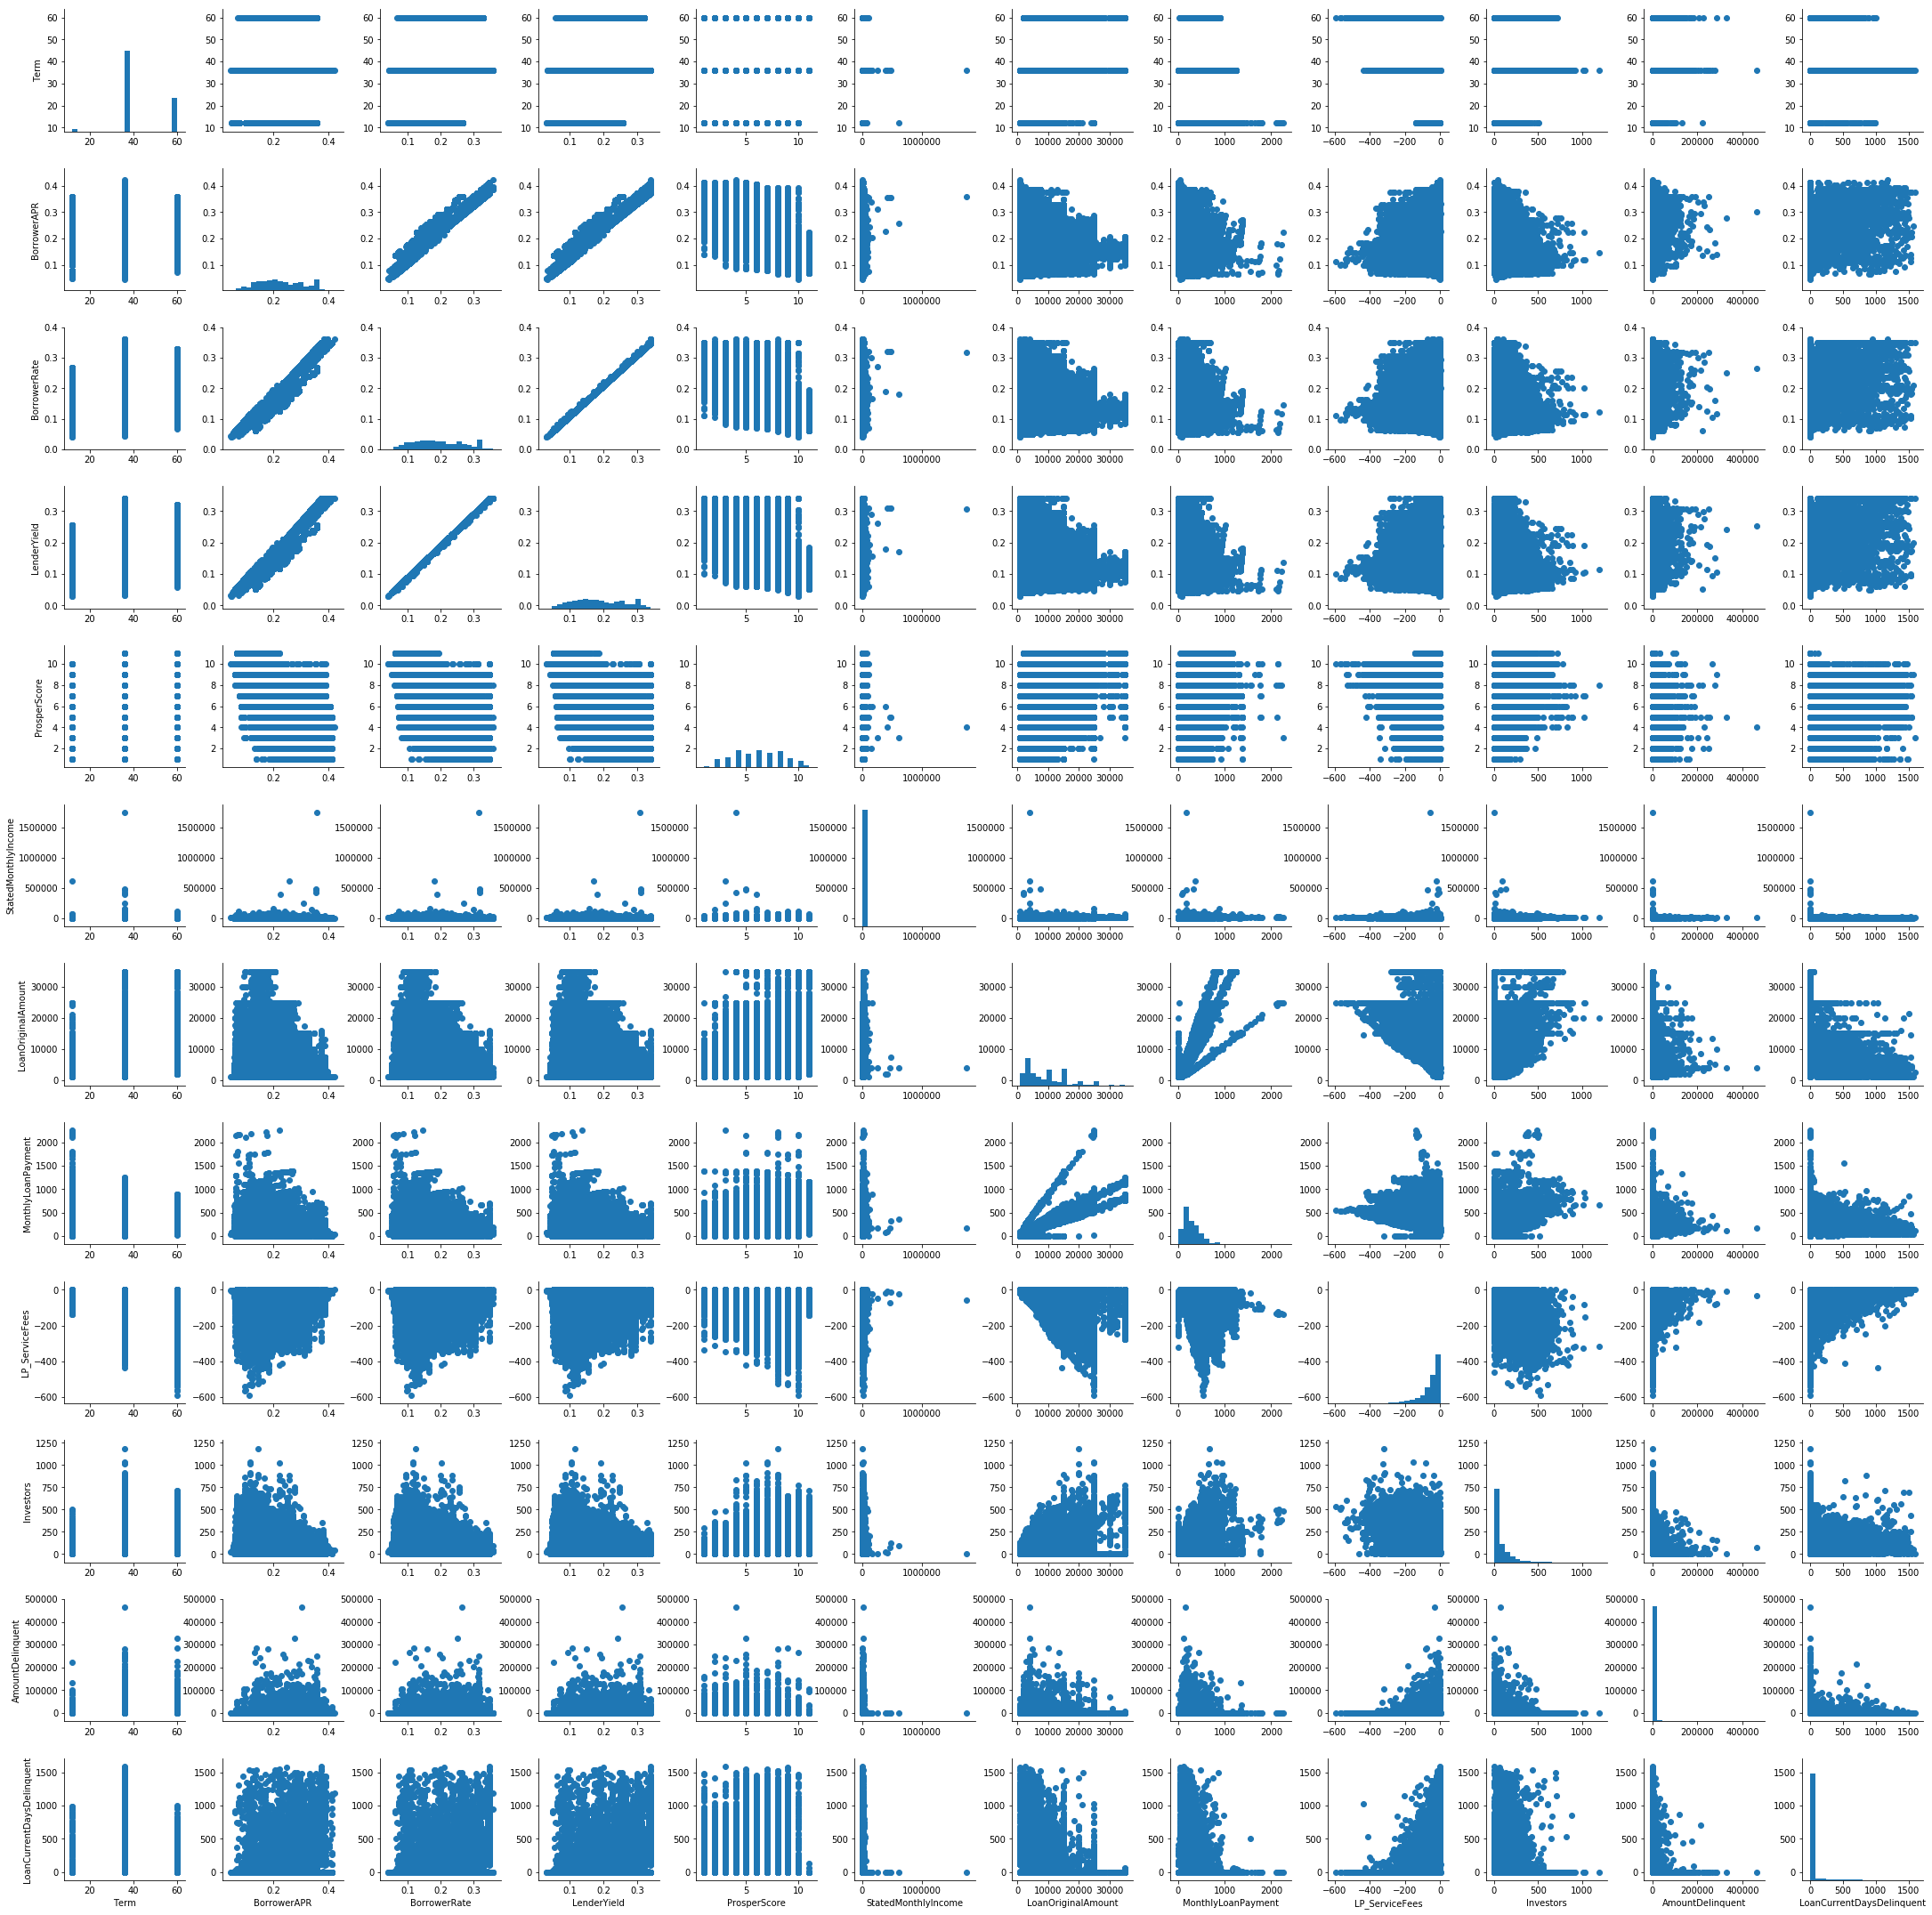

In [29]:
# plot matrix. It takes time to run

g = sb.PairGrid(df_loans[numeric_variables].dropna())
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

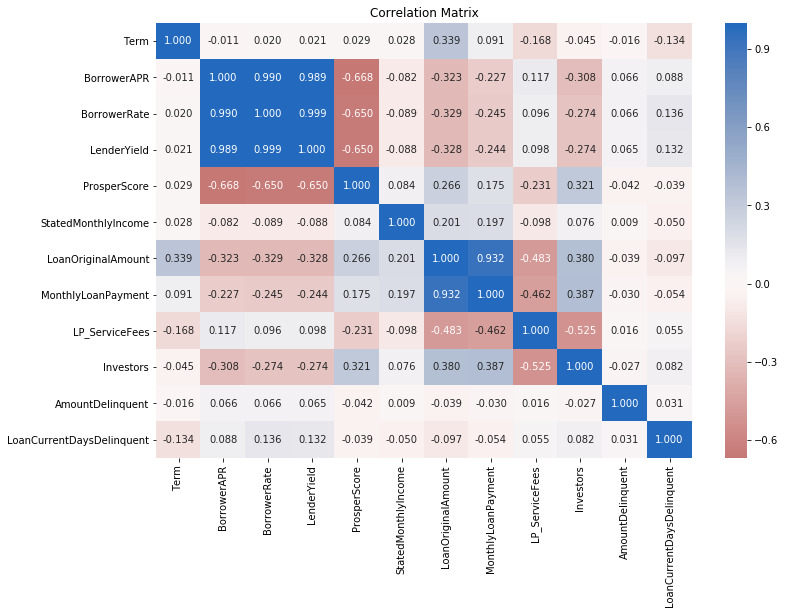

In [30]:
# Correlation matrix for all numeric variables
plt.figure(figsize = [12, 8])
sb.heatmap(df_loans[numeric_variables].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Matrix') 
plt.show()

Positive correlation between BorrowerAPR and Borrower rate.
Positive correlation between Lender yield and BorrowerAPR.


Negative correlation between prosper score and BorrowerAPR.
Negative correlation between prosper score and Lender yield

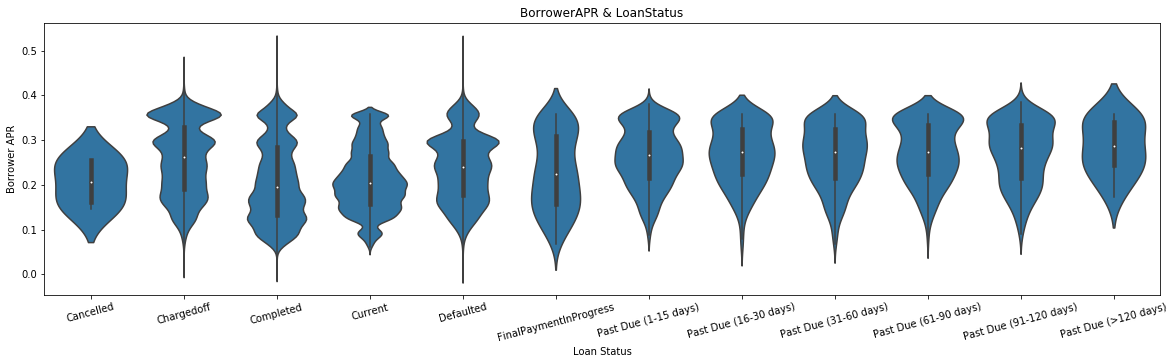

In [31]:
# Borrower APR vs Status of Loan 
plt.figure(figsize = [20, 5])
base_color= sb.color_palette()[0]
sb.violinplot(data=df_loans,y='BorrowerAPR',x='LoanStatus',color=base_color)
plt.title('BorrowerAPR & LoanStatus')
plt.ylabel('Borrower APR')
plt.xlabel('Loan Status')
plt.xticks(rotation=15);

We notice that Current and completed loans have lower rate than the past-due loans and have lower mean

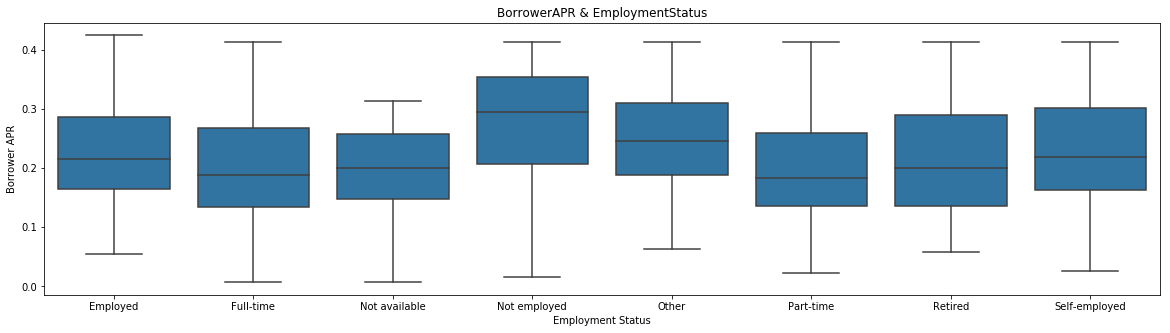

In [32]:
# Borrower APR vs Employment status
plt.figure(figsize = [20, 5])

sb.boxplot(data=df_loans,y='BorrowerAPR',x='EmploymentStatus',color=base_color);
plt.title('BorrowerAPR & EmploymentStatus');
plt.ylabel('Borrower APR');
plt.xlabel('Employment Status');

Employed people have lower IQR than not employed

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Employed people receive lower interest rate.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The loan status for the past dues have a high interest rate.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

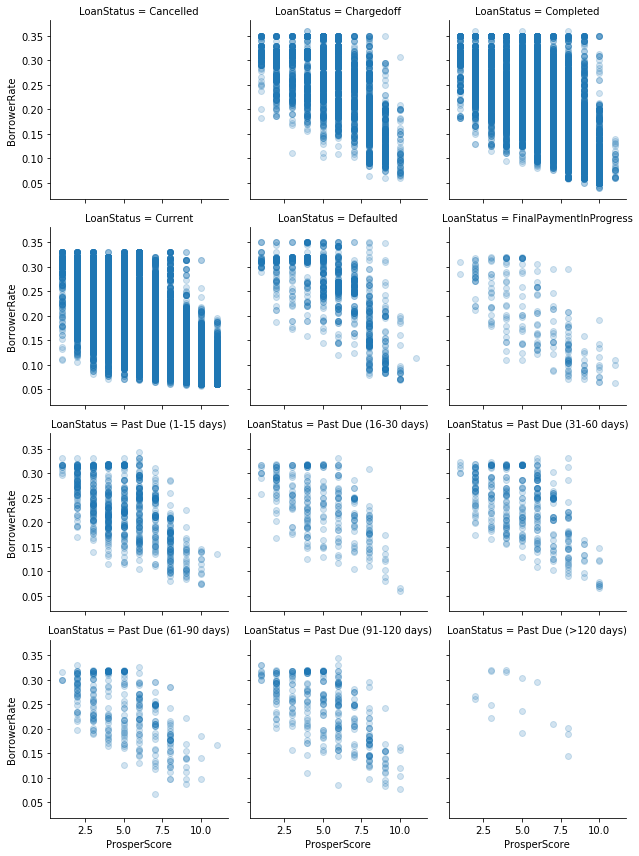

In [33]:
# plotting
g = sb.FacetGrid(data = df_loans, col = 'LoanStatus', size = 3, col_wrap = 3)
g.map(plt.scatter, 'ProsperScore', 'BorrowerRate', alpha = 1/5);

Prosper score is high on the completed loans and the rates are mostly lower on the high prosper score

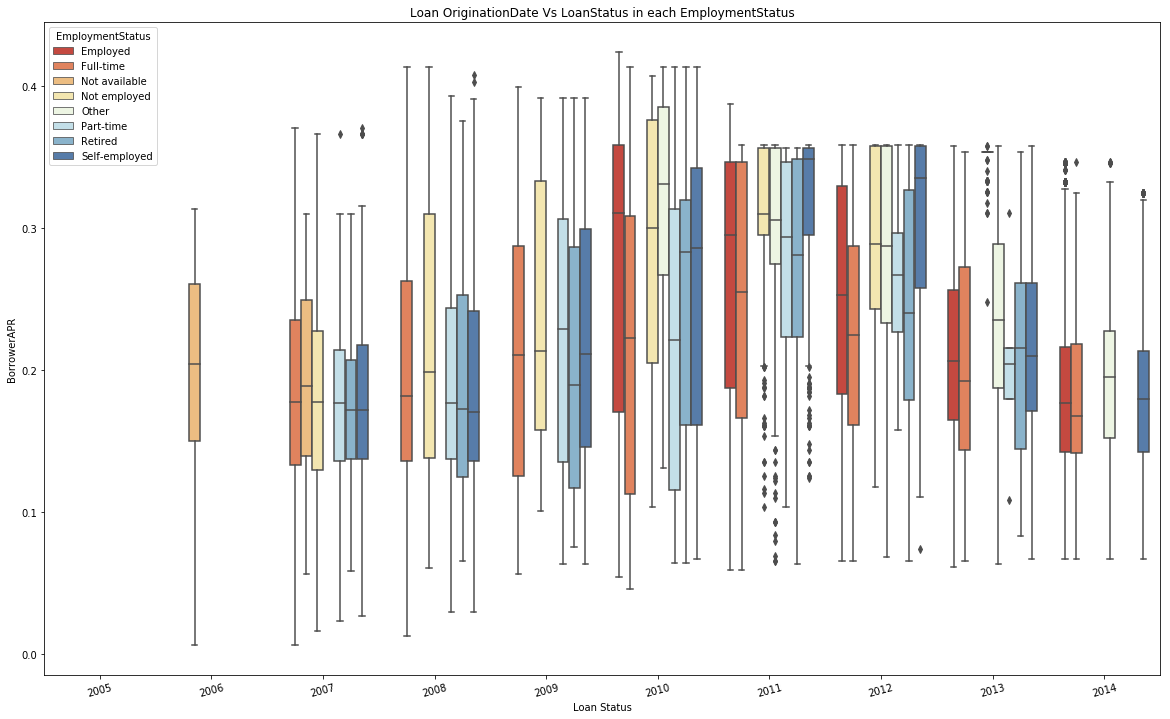

In [34]:
# LoanStatus Vs BorrowerAPR in each EmploymentStatus
plt.figure(figsize=[20,12])
sb.boxplot(x=df_loans['LoanOriginationDate'].dt.year, y="BorrowerAPR", hue="EmploymentStatus", data=df_loans, palette='RdYlBu')
plt.title('Loan OriginationDate Vs LoanStatus in each EmploymentStatus')
plt.xlabel('Loan Status')
plt.ylabel('BorrowerAPR')
plt.xticks(rotation = 15);

Self employed get a lower interest rate and the years proceed

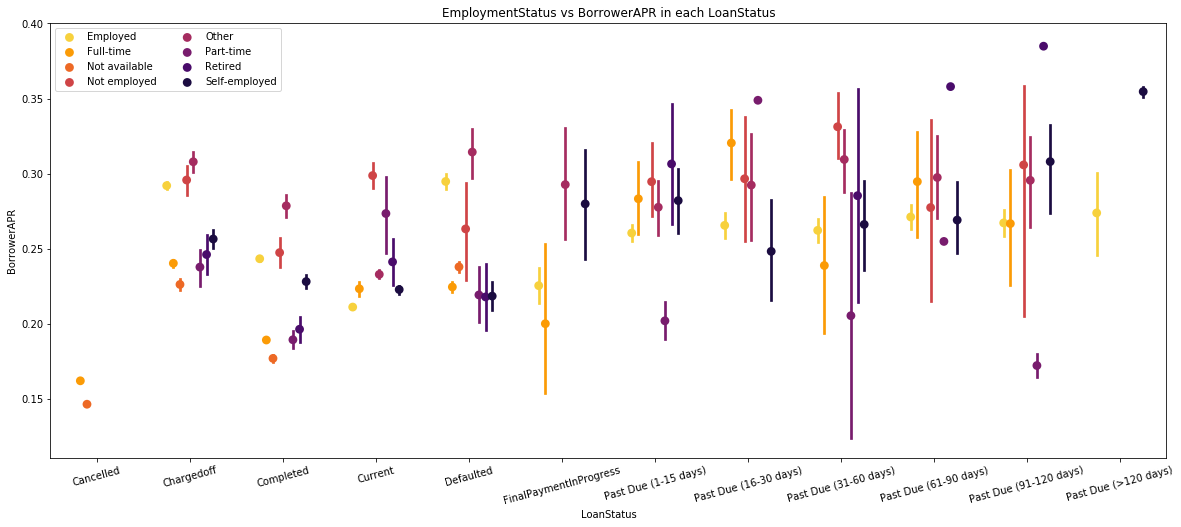

In [35]:
# EmploymentStatus vs BorrowerAPR in each LoanStatus
fig = plt.figure(figsize = [20,8])
ax = sb.pointplot(data = df_loans, x = 'LoanStatus', y = 'BorrowerAPR', hue = 'EmploymentStatus', linestyles = "",
                  dodge = 0.5, palette = 'inferno_r')
plt.title('EmploymentStatus vs BorrowerAPR in each LoanStatus')
plt.ylabel('BorrowerAPR')
plt.xticks(rotation=15)
plt.legend(ncol=2)
plt.show();

Past Due loans generally have higher interest rates in all employment status

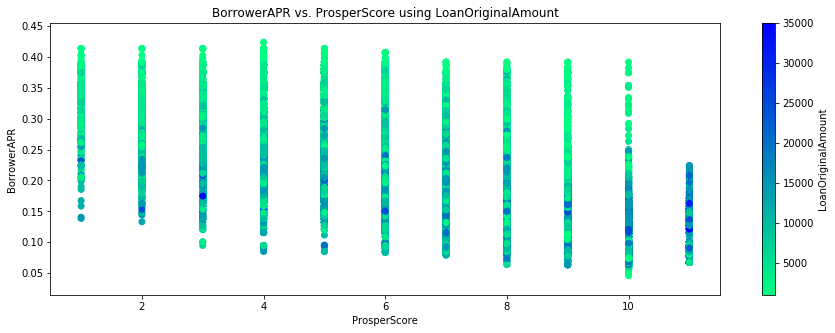

In [36]:
# BorrowerAPR vs. CreditScoreRangeUpper & CreditScoreRangeUpper
plt.figure(figsize = [15, 5]) 
plt.scatter(data=df_loans[df_loans['StatedMonthlyIncome']<20000],x='ProsperScore',y='BorrowerAPR',c='LoanOriginalAmount',cmap='winter_r') 
plt.colorbar(label = 'LoanOriginalAmount')
plt.title('BorrowerAPR vs. ProsperScore using LoanOriginalAmount')
plt.xlabel('ProsperScore')
plt.ylabel('BorrowerAPR');

We see that most of the loans with higher amounts (>$20,000) are taken by people with higher prosper score

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Prosper score is high on the completed loans and the rates are mostly lower on the high prosper score
Self employed get a lower interest rate and the years proceed
Past Due loans generally have higher interest rates in all employment status

### Were there any interesting or surprising interactions between features?

>  ProsperScore and BorrowerAPR are negatively correlated

## Conclusions
> Scatter plot are most commonly used plot to show  relations between two variables. In this project, I first made a scatter  matrix which shows multiple comparisons at once. From the scatter matrix  now filter out some variables that have weak correlations with the  target variable. For those have stronger correlations, I can further  study their relationships.
A simple way to show relationships among multi variables is to add colors  to the plot. Using different colors to represent factorial variables.